In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [78]:
percentage_child_labor = 1
gdp_percentage = 0.04
rate = 0.071 ##interest rate
slw = 140
uslw = 40
t = 0.015 * 0.8 
lifespan_labor = 58
gdp =  70.39 * 10**9
num_children = 4000000

In [74]:
# Simulation parameters
simulation_duration = 58  # Number of years
initial_child_labor_percentage = 1 # Initial percentage of child labor
reduction_rate = 0.012  # Rate at which child labor reduces per year

# Initialize lists to store simulation data
years = np.arange(simulation_duration)
child_labor_percentages = [initial_child_labor_percentage]

# Simulate child labor rates over time
for year in range(1, simulation_duration):
    previous_percentage = child_labor_percentages[year - 1]
    current_percentage = previous_percentage - (previous_percentage * reduction_rate)
    child_labor_percentages.append(current_percentage)



In [75]:
def future_earnings(rate, lifespan_labor):
    sum= 0
    for i in range(lifespan_labor+1):
        sum += 1/(1+rate)**i
    return sum

In [82]:
def calculate_benefits(percentage_child_labor, num_children, gdp_percentage, gdp, slw, uslw, t, rate, lifespan_labor):
    health_benefits = percentage_child_labor * num_children *(gdp_percentage * gdp + (slw - uslw) * t ) * future_earnings(rate, lifespan_labor)
    return health_benefits * 0.053####inflation rate is 5.3%

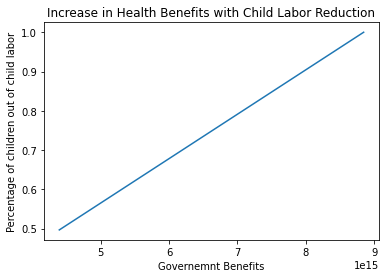

In [81]:
x_values = np.linspace(0, 1, 1000)
y_values = [calculate_benefits(percentage_child_labor, num_children, gdp_percentage, gdp, slw, uslw, t, rate, lifespan_labor) for percentage_child_labor in child_labor_percentages]
# y_values_1 = [calculate_benefits(percentage_child_labor, num_children, gdp_percentage, gdp*1.2, slw, uslw, t, rate, lifespan_labor) for percentage_child_labor in child_labor_percentages]
plt.plot(y_values, child_labor_percentages)
# plt.plot(y_values_1, child_labor_percentages)
plt.xlabel("Governemnt Benefits")
plt.ylabel("Percentage of children out of child labor")
plt.title("Increase in Health Benefits with Child Labor Reduction")
plt.show()